# GARCH model for volatility

In [ ]:
library(readr)
library(readxl)

In [13]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Tipo de cambio trimestral.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
data$TCRB <- as.numeric(data$TCRB)

head(data)

Fecha,TCRB
<date>,<dbl>
1991-06-01,63.350642
1991-09-01,-56.637445
1991-12-01,23.096228
1992-03-01,-51.581521
1992-06-01,8.226337
1992-09-01,27.281315


In [14]:
data_ts <- ts(data$TCRB, start = c(1991, 2), frequency = 4)
class(data_ts)
head(data_ts)

[1] "ts"

[1]  63.350642 -56.637445  23.096228 -51.581521   8.226337  27.281315

In [18]:
install.packages("forecast")

also installing the dependencies 'lmtest', 'urca'





  There are binary versions available but the source versions are later:
         binary source needs_compilation
urca      1.3-3  1.3-4              TRUE
forecast 8.21.1 8.23.0              TRUE


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//Rtmp7MJpE9/downloaded_packages


installing the source packages 'urca', 'forecast'




In [29]:
# install.packages("tseries")
library(tseries)
library(forecast)

Series: data_ts 
ARIMA(1,0,2) with zero mean 

Coefficients:
          ar1     ma1     ma2
      -0.9694  0.9539  0.3150
s.e.   0.0440  0.0992  0.0914

sigma^2 = 142.9:  log likelihood = -522
AIC=1051.99   AICc=1052.3   BIC=1063.58

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set 0.4951261 11.82127 8.202291 86.49013 138.5221 0.7423283 0.0215961

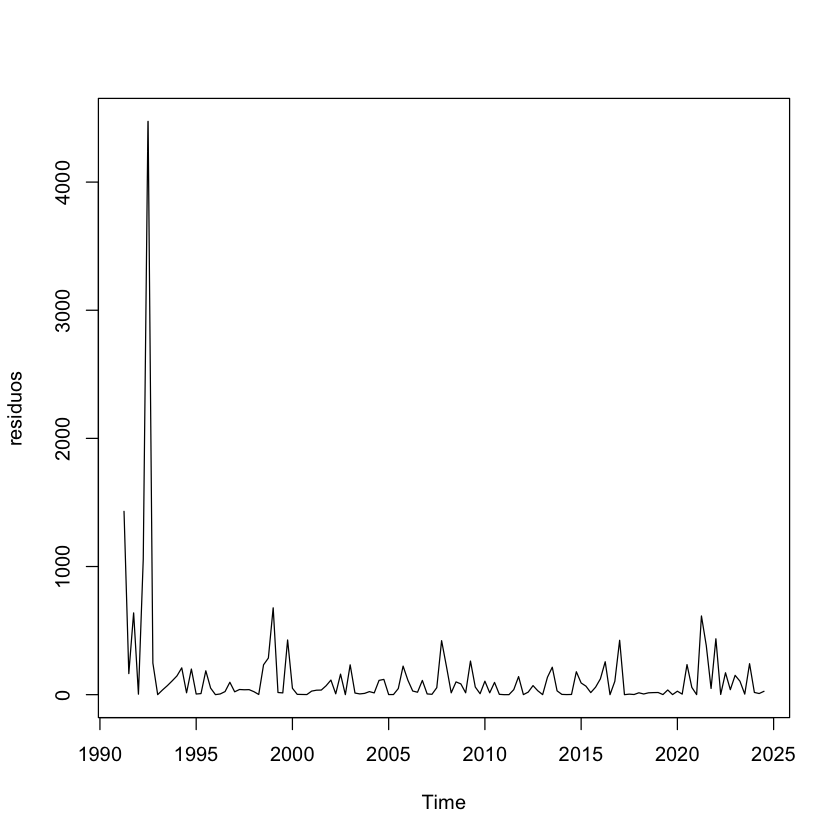

In [26]:
# ARMA (1,2)
fit_arma <- auto.arima(data_ts)
summary(fit_arma)

# Obtener los residuos
residuos <- residuals(fit_arma)
residuos <- residuos^2
plot(residuos)

In [47]:
install.packages("nloptr", type = "binary")
install.packages("quantreg", type = "binary")
install.packages("lme4", type = "binary")
install.packages("pbkrtest", type = "binary")
install.packages("car", type = "binary")



  There is a binary version available (and will be installed) but the
  source version is later:
       binary source
nloptr  2.0.3  2.1.1


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//Rtmp7MJpE9/downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
         binary source
quantreg   5.97 5.99.1


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//Rtmp7MJpE9/downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
       binary   source
lme4 1.1-35.1 1.1-35.5


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//Rtmp7MJpE9/downloaded_packages

  There is a binary version available (and will be installed) but the
  source version is later:
         binary source
pbkrtest  0.5.2  0.5.3


The downloaded binary packages are in
	/var/folders/k0/5jhn7

In [44]:
## install.packages("dynlm")
### install.packages("car")
install.packages("dynlm")

also installing the dependencies 'nloptr', 'pbkrtest', 'quantreg', 'lme4', 'car'





  There are binary versions available but the source versions are later:
           binary   source needs_compilation
nloptr      2.0.3    2.1.1              TRUE
pbkrtest    0.5.2    0.5.3             FALSE
quantreg     5.97   5.99.1              TRUE
lme4     1.1-35.1 1.1-35.5              TRUE
car         3.1-2    3.1-3             FALSE


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//Rtmp7MJpE9/downloaded_packages


installing the source packages 'nloptr', 'pbkrtest', 'quantreg', 'lme4', 'car'


Warning message in install.packages("dynlm"):
"installation of package 'nloptr' had non-zero exit status"
Warning message in install.packages("dynlm"):
"installation of package 'quantreg' had non-zero exit status"
Warning message in install.packages("dynlm"):
"installation of package 'lme4' had non-zero exit status"
Warning message in install.packages("dynlm"):
"installation of package 'pbkrtest' had non-zero exit status"
Warning message in install.packages("dynlm"):
"installation of package 'car' had non-zero exit status"


In [48]:
library(dynlm)

In [50]:
# Realizar la prueba ARCH de  lag p
data.arch <- dynlm(residuos ~ L(residuos), data = data_ts) 
summary(data.arch)


Time series regression with "ts" data:
Start = 1991(3), End = 2024(3)

Call:
dynlm(formula = residuos ~ L(residuos), data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-761.0 -104.1  -85.8    2.5 4159.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 101.58145   36.77090   2.763  0.00656 **
L(residuos)   0.20239    0.08239   2.457  0.01534 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 402.5 on 131 degrees of freedom
Multiple R-squared:  0.04404,	Adjusted R-squared:  0.03674 
F-statistic: 6.035 on 1 and 131 DF,  p-value: 0.01534


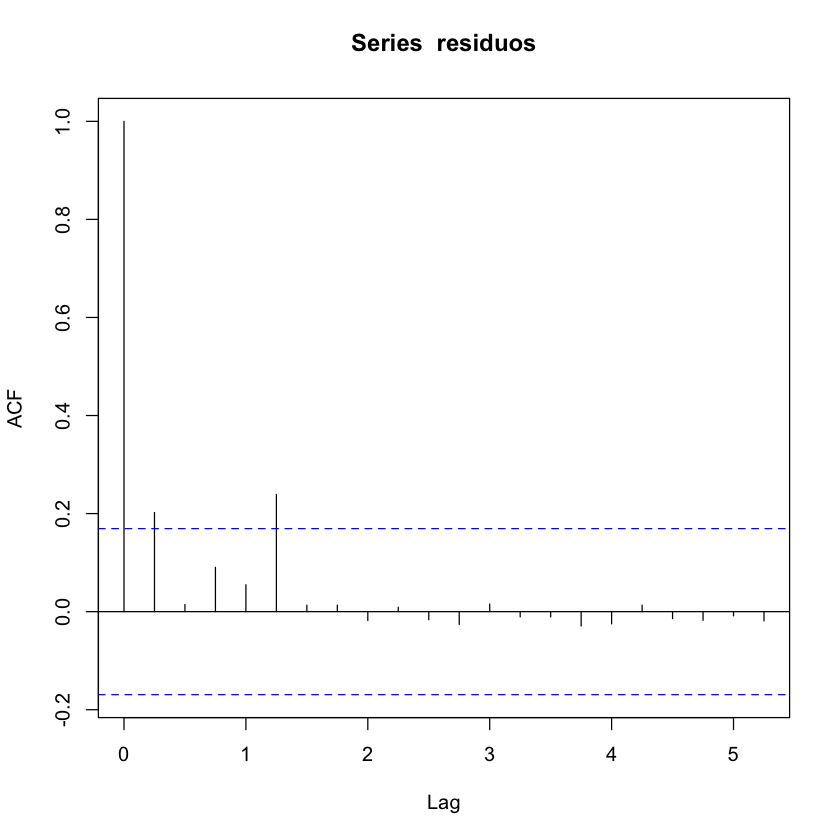

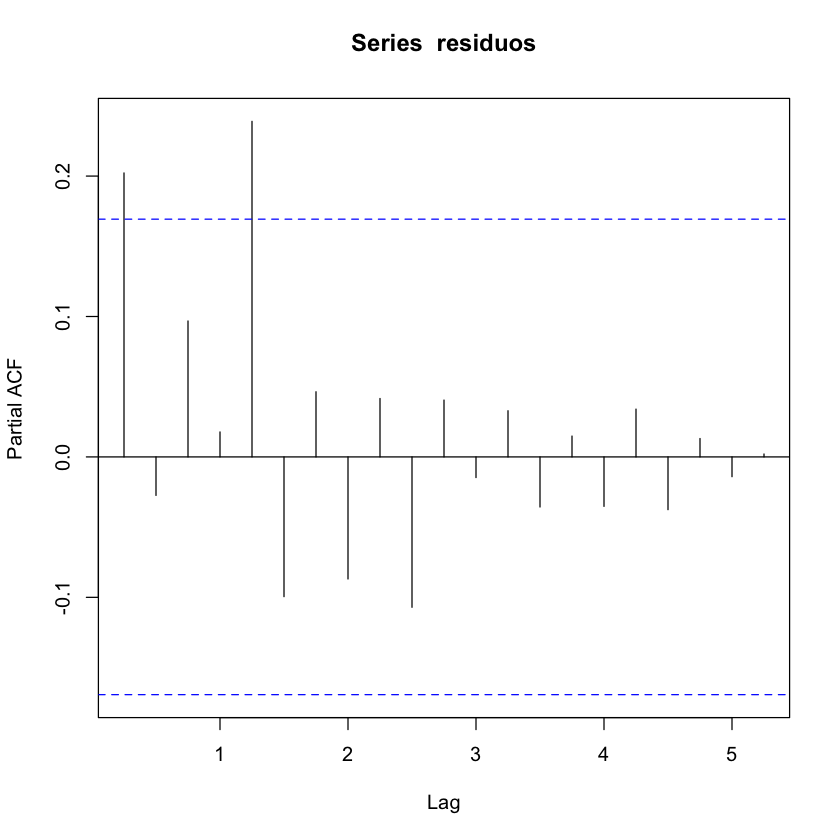

In [52]:
acf(residuos)
pacf(residuos)

In [55]:
# install.packages("rugarch")
library(rugarch)

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma




In [57]:
garch12 <- ugarchspec(mean.model = list(armaOrder=c(1,2)))
garch12 


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,2)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


In [58]:
data_garch <- ugarchfit(spec = garch12, data = data_ts)
data_garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,2)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      -0.09297    0.967694 -0.096074 0.923462
ar1     -0.65385    0.274312 -2.383587 0.017145
ma1      0.93548    0.294957  3.171581 0.001516
ma2      0.13749    0.161724  0.850129 0.395253
omega   21.91550    7.459018  2.938121 0.003302
alpha1   0.20775    0.095676  2.171380 0.029902
beta1    0.49072    0.126422  3.881599 0.000104

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      -0.09297     1.22852 -0.075677 0.939676
ar1     -0.65385     0.51374 -1.272728 0.203115
ma1      0.93548     0.49039  1.907630 0.056439
ma2      0.13749     0.34551  0.397920 0.690689
omega   21.91550     5.33472  4.108087 0.0

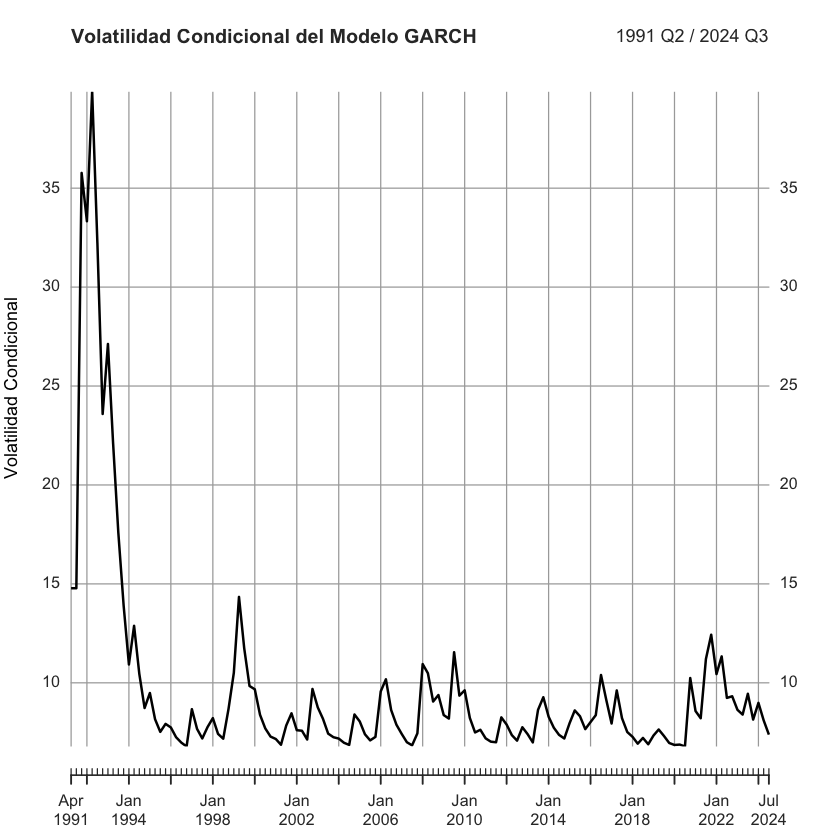

In [59]:
# Extraer la volatilidad condicional
volatility <- sigma(data_garch)

# Graficar la volatilidad condicional
plot(volatility, main = "Volatilidad Condicional del Modelo GARCH", ylab = "Volatilidad Condicional", xlab = "Tiempo")

In [68]:
library(readr)
library(readxl)
library(dplyr)
library(writexl)

In [63]:
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'




In [69]:
volatility_df <- data.frame(
  Date = time(volatility),      # Fechas
  Volatility = as.numeric(volatility) # Valores ajustados
)

write_xlsx(volatility_df, "volatility_TCR_trim.xlsx")